In [1]:
from google.colab import files
uploaded = files.upload()

Saving Engg_College_Data.csv to Engg_College_Data.csv


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.cluster import AgglomerativeClustering

In [3]:
df = pd.read_csv('Engg_College_Data.csv')
df

,SR_NO,Engg_College,Teaching,Fees,Placements,Internship,Infrastructure
0,1,A,5,2,5,5,3
1,2,B,4,2,5,5,3
2,3,C,4,5,5,4,5
3,4,D,5,4,5,4,4
4,5,E,2,5,2,2,5
5,6,F,3,4,3,3,4
6,7,G,1,3,1,1,2
7,8,H,4,4,5,5,5
8,9,I,4,4,4,4,4
9,10,J,3,4,3,4,5


In [36]:
X = df.iloc[:,2:7]
X

,Teaching,Fees,Placements,Internship,Infrastructure
0,5,2,5,5,3
1,4,2,5,5,3
2,4,5,5,4,5
3,5,4,5,4,4
4,2,5,2,2,5
5,3,4,3,3,4
6,1,3,1,1,2
7,4,4,5,5,5
8,4,4,4,4,4
9,3,4,3,4,5


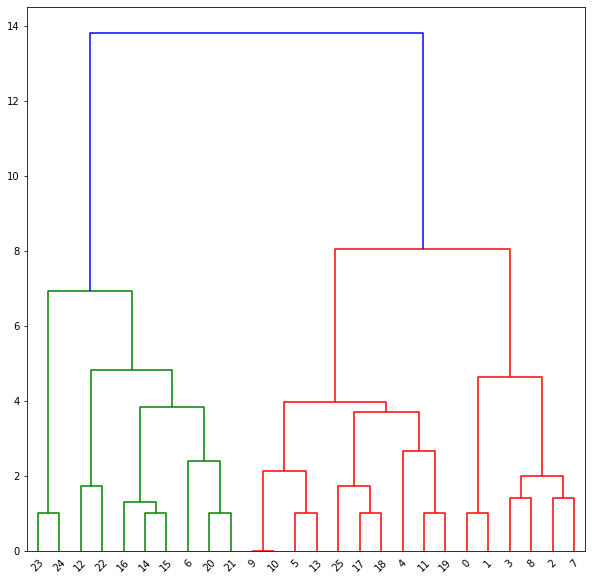

In [14]:
Z = linkage(X, 'ward')
fig = plt.figure(figsize=(10, 10))
dn = dendrogram(Z)

In [16]:
Z = linkage(X, method='average', metric='euclidean')
Z[0]

array([ 9., 10.,  0.,  2.])

In [23]:
label = fcluster(Z, 4, criterion='distance')
np.unique(label)

array([1, 2, 3], dtype=int32)

In [24]:
label

array([1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 3, 3, 3, 1, 1, 1, 3, 3,
       3, 2, 2, 1], dtype=int32)

In [38]:
df['cluster'] = label
df

,SR_NO,Engg_College,Teaching,Fees,Placements,Internship,Infrastructure,cluster
0,1,A,5,2,5,5,3,1
1,2,B,4,2,5,5,3,1
2,3,C,4,5,5,4,5,1
3,4,D,5,4,5,4,4,1
4,5,E,2,5,2,2,5,1
5,6,F,3,4,3,3,4,1
6,7,G,1,3,1,1,2,3
7,8,H,4,4,5,5,5,1
8,9,I,4,4,4,4,4,1
9,10,J,3,4,3,4,5,1


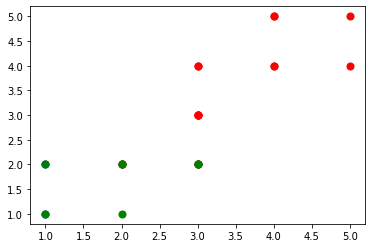

In [30]:
plt.scatter(df.loc[label==1, 'Teaching'], df.loc[label==1, 'Internship'], s=50, marker='o', color='red')
plt.scatter(df.loc[label==2, 'Teaching'], df.loc[label==2, 'Internship'], s=50, marker='o', color='blue')
plt.scatter(df.loc[label==3, 'Teaching'], df.loc[label==3, 'Internship'], s=50, marker='o', color='green')

plt.show()

In [33]:
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)
y_hc

array([1, 1, 1, 1, 2, 2, 0, 1, 1, 2, 2, 2, 0, 2, 0, 0, 0, 2, 2, 2, 0, 0,
       0, 0, 0, 2])

In [37]:
X['pred_sklearn'] = y_hc
X

,Teaching,Fees,Placements,Internship,Infrastructure,pred_sklearn
0,5,2,5,5,3,1
1,4,2,5,5,3,1
2,4,5,5,4,5,1
3,5,4,5,4,4,1
4,2,5,2,2,5,2
5,3,4,3,3,4,2
6,1,3,1,1,2,0
7,4,4,5,5,5,1
8,4,4,4,4,4,1
9,3,4,3,4,5,2


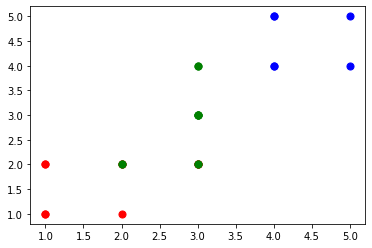

In [39]:
plt.scatter(X.loc[y_hc==0, 'Teaching'], X.loc[y_hc==0, 'Internship'], s=50, marker='o', color='red')
plt.scatter(X.loc[y_hc==1, 'Teaching'], X.loc[y_hc==1, 'Internship'], s=50, marker='o', color='blue')
plt.scatter(X.loc[y_hc==2, 'Teaching'], X.loc[y_hc==2, 'Internship'], s=50, marker='o', color='green')

plt.show()